# Which Skills are Most Likely to Appear on a Job Posting in any Given Month (Trending)?

### Methodology

1. Clean the skill column and create a table exploring the skill count of job postings monthly
2. Plot the count of job skills for each month
3. Calculate the probability to find a particular skill in a job posting each month
4. Plot the probability to find a job skill in a job posting for each month

NOTE: all explorations will focus on the following: 
- Roles: 
  - Data Analyst
  - Data Engineer
  - Data Scientist
- Countries: 
  - United Kingdom
  - United States
  - India


### Import Libraries

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Vikram Kapoor\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Part 1 - Clean the Skill Column and Create a Table Exploring the Skill Count of Job Postings Monthly

### Filter Dataset for Specified Roles / Countries & Create Column for Month Names

In [2]:
# List Containing Job Roles: Data Analyst, Data Engineer, Data Science
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# List Containing Countries: United Kingdom, United States, India
countries = ['United Kingdom', 'United States', 'India']

# Filter the Dataset for Job Roles and Countries
df_job_ctry = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'].isin(countries))]

# Obtain Month Name (Abbreviated)
df_job_ctry['job_posted_month'] = df_job_ctry['job_posted_date'].dt.strftime('%B')

C:\Users\Vikram Kapoor\AppData\Local\Temp\ipykernel_11588\2766323363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_job_ctry['job_posted_month'] = df_job_ctry['job_posted_date'].dt.strftime('%B')


### Explode the Skills Column

In [3]:
# Explode job_skills
df_job_ctry_exp = df_job_ctry.explode('job_skills')

### Obtain Pivot to Display the Count of Job Skills for Each Month (Unordered First)

In [4]:
# Create Pivot Table
df_job_ctry_piv = df_job_ctry_exp.pivot_table(
    index = ['job_country', 'job_title_short', 'job_posted_month'], 
    columns = 'job_skills', 
    aggfunc = 'size', 
    fill_value = 0
    )
df_job_ctry_piv

job_skills                                      airflow  airtable  alteryx  \
job_country   job_title_short job_posted_month                               
India         Data Analyst    April                   8         0        8   
                              August                 19         0       25   
                              December                7         0       19   
                              February                7         0       17   
                              January                 3         0       21   
...                                                 ...       ...      ...   
United States Data Scientist  March                  95         1       61   
                              May                    93         8       34   
                              November               69         5       41   
                              October                88         6       56   
                              September              76         3       51   

job_skills                                      angular  angular.js  ansible  \
job_country   job_title_short job_posted_month                                 
India         Data Analyst    April                   1           0        0   
                              August                  2           0        0   
                              December                0           0        0   
                              February                1           0        0   
                              January                 1           0        0   
...                                                 ...         ...      ...   
United States Data Scientist  March                  19           0        5   
                              May                    12           1       10   
                              November               17           1        9   
                              October                13           2       18   
                              September              15           0       16   

job_skills                                      apl  arch  asana  asp.net  \
job_country   job_title_short job_posted_month                              
India         Data Analyst    April               0     4      0        1   
                              August              0     0      0        0   
                              December            0     0      0        1   
                              February            0     2      0        0   
                              January             0     0      0        1   
...                                             ...   ...    ...      ...   
United States Data Scientist  March               8     6      1        7   
                              May                 3     4      1        4   
                              November            5     0      3        2   
                              October             6     0      5        3   
                              September           9     3      3        2   

job_skills                                      ...  webex  windows  wire  \
job_country   job_title_short job_posted_month  ...                         
India         Data Analyst    April             ...      1        4     0   
                              August            ...      0        4     0   
                              December          ...      0        5     1   
                              February          ...      1        5     0   
                              January           ...      1        4     1   
...                                             ...    ...      ...   ...   
United States Data Scientist  March             ...      0       76     4   
                              May               ...      0       58     2   
                              November          ...      0       46     0   
                              October           ...      1       76     4   
                  

### Order the Months

In [5]:
# Create a Column for Month Numbers e.g. Jan Would be 1, Feb 2 etc.
df_job_ctry_piv.reset_index(inplace=True)
df_job_ctry_piv['job_posted_month_no'] = pd.to_datetime(df_job_ctry_piv['job_posted_month'], format='%B').dt.month

# Sort Months in Descending Order Using New Month Number Column
df_job_ctry_piv.sort_values('job_posted_month_no', inplace = True)

# Set job_posted_month as the Index and Drop Unnecessary Column Containing Month Numbers
df_job_ctry_piv.set_index('job_posted_month', inplace = True)
df_job_ctry_piv.drop(columns = 'job_posted_month_no', inplace = True)

df_job_ctry_piv

job_skills,job_country,job_title_short,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,India,Data Scientist,31,0,21,11,0,5,0,1,...,1,15,0,30,0,0,0,0,3,2
January,India,Data Engineer,305,2,41,26,0,31,0,0,...,0,31,0,18,0,0,0,0,34,1
January,United States,Data Engineer,347,0,45,20,2,42,0,0,...,0,43,2,68,0,0,0,0,9,5
January,United States,Data Scientist,184,3,137,47,0,16,4,8,...,1,90,16,289,0,0,0,0,11,16
January,United Kingdom,Data Analyst,4,2,31,0,0,0,0,0,...,0,14,0,68,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
December,United States,Data Engineer,328,0,33,19,0,20,2,2,...,3,50,4,52,0,1,0,0,22,11
December,United Kingdom,Data Analyst,2,0,17,0,0,0,0,0,...,0,4,0,31,0,0,0,0,0,3
December,India,Data Scientist,25,0,15,2,0,4,0,2,...,1,10,0,20,0,0,0,0,3,2


### Filter for India / Data Analyst Roles and Order the Count for Job Skills to Find the Top 5 Skills

In [6]:
# Filter for India / Data Analyst Roles
df_da_ind = df_job_ctry_piv[(df_job_ctry_piv['job_country'] == 'India') & (df_job_ctry_piv['job_title_short'] == 'Data Analyst')]

# Create a Row That Obtains the Total for Each job_skill
df_da_ind.loc['Total'] = df_da_ind.sum()

# Sort the Pivot Table Using the New Total Row by Ascending Order
df_da_ind = df_da_ind.reindex(columns = df_da_ind.loc['Total'].apply(pd.to_numeric, errors='coerce').sort_values(ascending=False).index)

## NOTE: .apply(pd.to_numeric, errors = 'coerce') -> Converts values to numeric, setting non-numeric values to NaN

# Drop Unnecessary Total Row 
df_da_ind = df_da_ind.drop('Total')

df_da_ind.iloc[:, 0:5]

C:\Users\Vikram Kapoor\AppData\Local\Temp\ipykernel_11588\2906776843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da_ind.loc['Total'] = df_da_ind.sum()


job_skills,sql,python,excel,tableau,power bi
job_posted_month,,,,,
January,305,216,218,159,98
February,209,148,156,116,75
March,229,151,138,125,76
April,204,143,138,98,83
May,155,101,106,71,61
June,193,150,115,114,77
July,245,161,174,124,93
August,317,216,192,152,127
September,341,229,228,195,168


NOTE: This can be repeated for each country and job title

## Part 2 - Plot the Count of Job Skills for Each Month

C:\Users\Vikram Kapoor\AppData\Local\Temp\ipykernel_11588\679712248.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc['Total'] = df_plot.sum()
C:\Users\Vikram Kapoor\AppData\Local\Temp\ipykernel_11588\679712248.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)
C:\Users\Vikram Kapoor\AppData\Local\Temp\ipykernel_11588\679712248.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc['Total'] = df_plot.sum()
C:\Users\Vikram Kapoor\AppData\Local\Te

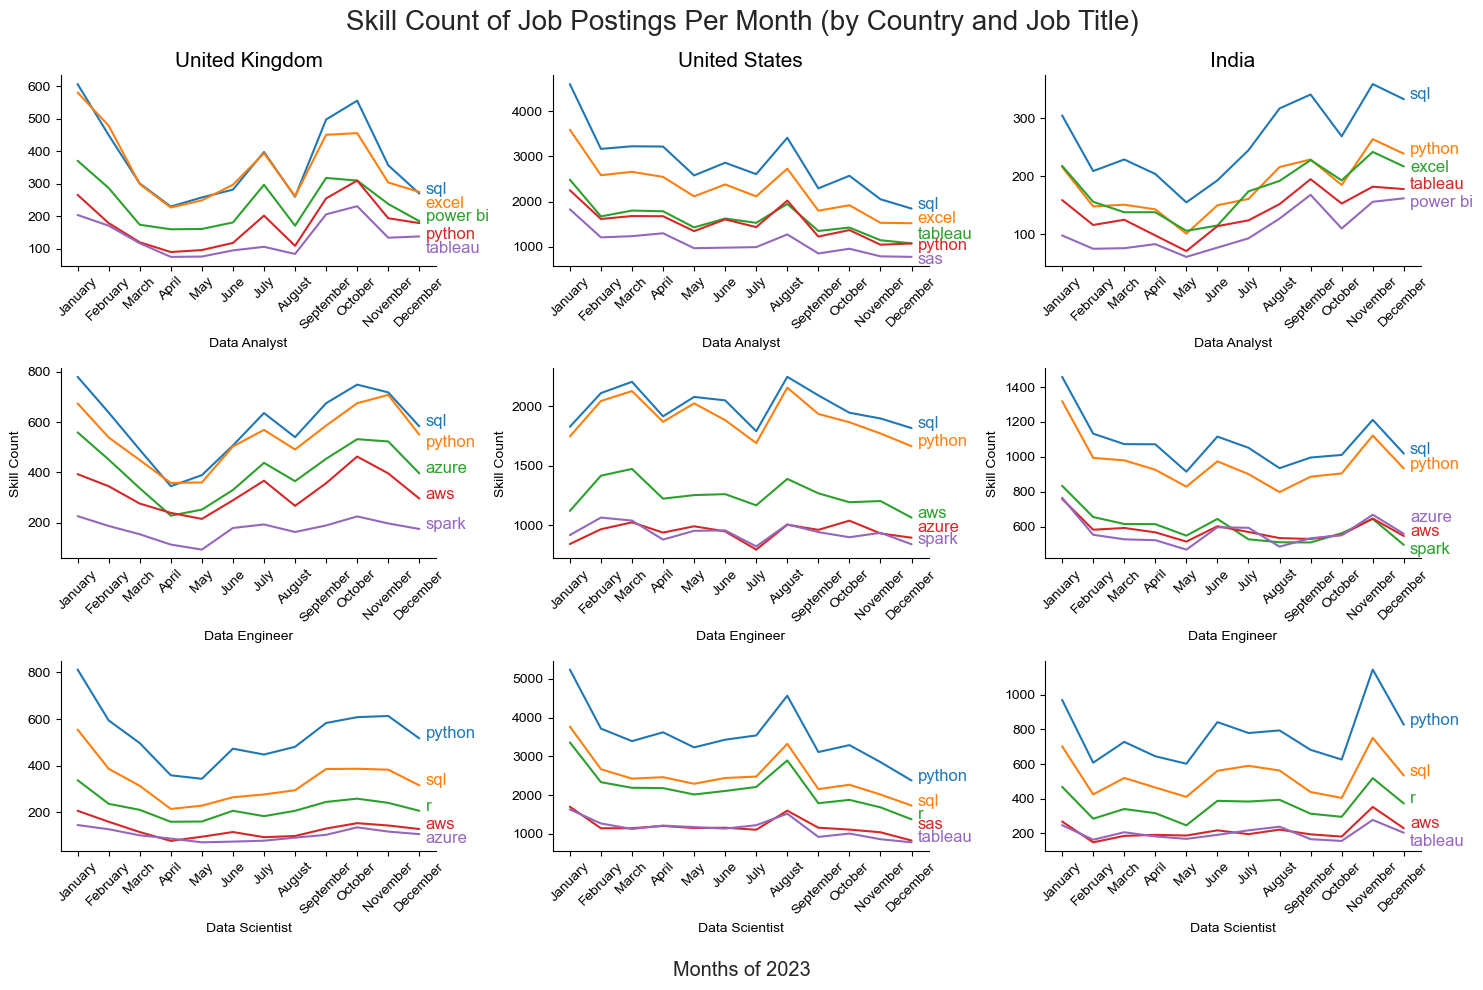

In [7]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters and Orders the Skills Count Table Using the Loop to Adjust the Filters Accordingly 
        df_plot = df_job_ctry_piv[(df_job_ctry_piv['job_country'] == country) & (df_job_ctry_piv['job_title_short'] == job_title)]
        df_plot.loc['Total'] = df_plot.sum()
        df_plot = df_plot.reindex(columns = df_plot.loc['Total'].apply(pd.to_numeric, errors='coerce').sort_values(ascending=False).index)
        df_plot = df_plot.drop('Total')
        df_plot = df_plot.iloc[:, 0:5]

# Creation of the Chart Using Seaborn        
        sns.lineplot(
             data = df_plot,
             ax = ax[i, j],
             dashes = False,
             palette = 'tab10',
             legend = False
             )
        
# Create Chart Titles for Top Row Only to Distinguish Column for Countries
        ax[0, j].set_title(countries[j], fontsize = 15)
        
# Creates x-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_titles[i])

# Rotate the Months on the X-Axis by 45 Degrees
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)

# Creates y-Axis Title for Middle Charts 
        if i == 1:
            ax[i, j].set_ylabel('Skill Count')
        else:
            ax[i, j].set_ylabel('')

# Label and Colour Text Next to Lines
        lines = ax[i, j].get_lines() 
# First Line 
        ax[i, j].text(11.2, df_plot.iloc[-1, 0], df_plot.columns[0], color=lines[0].get_color()) 
# Second Line
        if i == 0 and j == 0:
             ax[i, j].text(11.2, df_plot.iloc[-1, 1] - 50, df_plot.columns[1], color=lines[1].get_color()) 
        elif i == 1 and j == 0:
             ax[i, j].text(11.2, df_plot.iloc[-1, 1] - 50, df_plot.columns[1], color=lines[1].get_color())
        else:
             ax[i, j].text(11.2, df_plot.iloc[-1, 1], df_plot.columns[1], color=lines[1].get_color()) 
# Third Line
        if i == 1 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 2] - 50, df_plot.columns[2], color=lines[2].get_color())
        elif i == 0 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 2] - 10, df_plot.columns[2], color=lines[2].get_color())
        elif i == 0 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 2] + 100, df_plot.columns[2], color=lines[2].get_color())              
        else:
             ax[i, j].text(11.2, df_plot.iloc[-1, 2], df_plot.columns[2], color=lines[2].get_color())
# Fourth Line 
        if i == 0 and j == 0:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] - 50, df_plot.columns[3], color=lines[3].get_color())
        elif i == 2 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] + 300, df_plot.columns[3], color=lines[3].get_color())
        elif i == 0 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] - 150, df_plot.columns[3], color=lines[3].get_color())
        elif i == 1 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] + 50, df_plot.columns[3], color=lines[3].get_color())                
        else:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3], df_plot.columns[3], color=lines[3].get_color())
# Fifth Line 
        if i == 0 and j == 0:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 50, df_plot.columns[4], color=lines[4].get_color()) 
        elif i == 0 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 150, df_plot.columns[4], color=lines[4].get_color())
        elif i == 0 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 15, df_plot.columns[4], color=lines[4].get_color())
        elif i == 1 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] + 70, df_plot.columns[4], color=lines[4].get_color())
        elif i == 2 and j == 0:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 40, df_plot.columns[4], color=lines[4].get_color())
        elif i == 2 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 75, df_plot.columns[4], color=lines[4].get_color())
        else:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4], df_plot.columns[4], color=lines[4].get_color()) 
sns.despine()
fig.suptitle('Skill Count of Job Postings Per Month (by Country and Job Title)', fontsize = 20)
fig.supxlabel('Months of 2023')
plt.tight_layout()
plt.show()

## Part 3 - Calculate the Probability to Find a Particular Skill in a Job Posting Each Month

- SkillPercent = Probabiltiy to Find Job Skill in Job Posting for a Particular Month (%)
- SkillCount = Skill Count in Job Posting for a Particular Month
- JobsTotal = Total Count of Job Posting for a Particular Month

$SkillPercent = SkillCount / JobsTotal$

### Obtain Total Number of Postings Each Month

In [8]:
# Recall Table Displaying the Count of Job Skills for Each Month (Previously Created)
df_job_ctry_piv

job_skills,job_country,job_title_short,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,India,Data Scientist,31,0,21,11,0,5,0,1,...,1,15,0,30,0,0,0,0,3,2
January,India,Data Engineer,305,2,41,26,0,31,0,0,...,0,31,0,18,0,0,0,0,34,1
January,United States,Data Engineer,347,0,45,20,2,42,0,0,...,0,43,2,68,0,0,0,0,9,5
January,United States,Data Scientist,184,3,137,47,0,16,4,8,...,1,90,16,289,0,0,0,0,11,16
January,United Kingdom,Data Analyst,4,2,31,0,0,0,0,0,...,0,14,0,68,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
December,United States,Data Engineer,328,0,33,19,0,20,2,2,...,3,50,4,52,0,1,0,0,22,11
December,United Kingdom,Data Analyst,2,0,17,0,0,0,0,0,...,0,4,0,31,0,0,0,0,0,3
December,India,Data Scientist,25,0,15,2,0,4,0,2,...,1,10,0,20,0,0,0,0,3,2


In [9]:
# Create Loop to Obtain List of Job Totals (Refer to Pre-Exploded Df to Get No. of Job Postings)
jobs_total = []
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):
        df_sum = df_job_ctry[(df_job_ctry['job_country'] == country) & (df_job_ctry['job_title_short'] == job_title)]
        df_sum = df_sum['job_posted_month'].value_counts()
        jobs_total.append({'job_title_short': job_title,
                           'job_country': country,
                           'job_posted_month' : df_sum.index.tolist(),
                           'jobs_total_month': df_sum.values.tolist()})

In [10]:
# Create a DataFrame from the Results
df_jobs_total = pd.DataFrame(jobs_total)

In [11]:
# Explode the Lists
df_jobs_total = df_jobs_total.explode(['job_posted_month', 'jobs_total_month'])
df_jobs_total

,job_title_short,job_country,job_posted_month,jobs_total_month
0,Data Analyst,United Kingdom,January,1467
0,Data Analyst,United Kingdom,October,1175
0,Data Analyst,United Kingdom,September,1112
0,Data Analyst,United Kingdom,February,1051
0,Data Analyst,United Kingdom,July,892
...,...,...,...,...
8,Data Scientist,India,September,984
8,Data Scientist,India,April,946
8,Data Scientist,India,February,932
8,Data Scientist,India,October,902


In [12]:
# Order the Months Lifting Previous Code

# Create a Column for Month Numbers e.g. Jan Would be 1, Feb 2 etc.
df_jobs_total.reset_index(inplace=True)
df_jobs_total['job_posted_month_no'] = pd.to_datetime(df_jobs_total['job_posted_month'], format='%B').dt.month

# Sort Months in Descending Order Using New Month Number Column
df_jobs_total.sort_values('job_posted_month_no', inplace = True)

# Set job_posted_month as the Index and Drop Unnecessary Column Containing Month Numbers
df_jobs_total.set_index('job_posted_month', inplace = True)
df_jobs_total.drop(columns = ['job_posted_month_no', 'index'], inplace = True)

df_jobs_total = df_jobs_total.reset_index()

df_jobs_total

,job_posted_month,job_title_short,job_country,jobs_total_month
0,January,Data Analyst,United Kingdom,1467
1,January,Data Engineer,United Kingdom,1253
2,January,Data Engineer,United States,2655
3,January,Data Scientist,India,1444
4,January,Data Analyst,India,628
...,...,...,...,...
103,December,Data Analyst,India,648
104,December,Data Scientist,United Kingdom,752
105,December,Data Analyst,United States,3979
106,December,Data Engineer,India,1464


### Merge the Tables Job Skills Count by Month Table and Jobs Total Table

In [13]:
df_skills_perc = pd.merge(df_job_ctry_piv, df_jobs_total, how = 'left', on = ['job_posted_month', 'job_title_short', 'job_country'])
df_skills_perc

,job_posted_month,job_country,job_title_short,airflow,airtable,alteryx,angular,angular.js,ansible,apl,...,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom,jobs_total_month
0,January,India,Data Scientist,31,0,21,11,0,5,0,...,15,0,30,0,0,0,0,3,2,1444
1,January,India,Data Engineer,305,2,41,26,0,31,0,...,31,0,18,0,0,0,0,34,1,2132
2,January,United States,Data Engineer,347,0,45,20,2,42,0,...,43,2,68,0,0,0,0,9,5,2655
3,January,United States,Data Scientist,184,3,137,47,0,16,4,...,90,16,289,0,0,0,0,11,16,6915
4,January,United Kingdom,Data Analyst,4,2,31,0,0,0,0,...,14,0,68,0,0,1,0,0,2,1467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,December,United States,Data Engineer,328,0,33,19,0,20,2,...,50,4,52,0,1,0,0,22,11,2641
104,December,United Kingdom,Data Analyst,2,0,17,0,0,0,0,...,4,0,31,0,0,0,0,0,3,712
105,December,India,Data Scientist,25,0,15,2,0,4,0,...,10,0,20,0,0,0,0,3,2,1206
106,December,United States,Data Analyst,20,2,115,10,0,5,0,...,47,4,451,3,4,0,0,0,21,3979


### Calculate Probability of Finding a Job Posting for a Particular Month

In [14]:
# Select Columns from 'airflow' to 'thezoom'
columns_to_divide = df_skills_perc.columns[df_skills_perc.columns.get_loc('airflow') : df_skills_perc.columns.get_loc('zoom') + 1]

# Divide Selected Columns by 'jobs_total_month'
df_skills_perc[columns_to_divide] = df_skills_perc[columns_to_divide].div(df_skills_perc['jobs_total_month'], axis=0) * 100

# Jobs Total Month Column No Longer Necessary
df_skills_perc.drop(columns = ['jobs_total_month'], inplace = True)

# Choose Job Posted Month as Index
df_skills_perc = df_skills_perc.set_index('job_posted_month')

df_skills_perc

,job_country,job_title_short,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,India,Data Scientist,2.146814,0.0,1.454294,0.761773,0.0,0.34626,0.0,0.069252,...,0.069252,1.038781,0.0,2.077562,0.0,0.0,0.0,0.0,0.207756,0.138504
January,India,Data Engineer,14.305816,0.093809,1.923077,1.219512,0.0,1.454034,0.0,0.0,...,0.0,1.454034,0.0,0.844278,0.0,0.0,0.0,0.0,1.594747,0.046904
January,United States,Data Engineer,13.06968,0.0,1.694915,0.753296,0.07533,1.581921,0.0,0.0,...,0.0,1.619586,0.07533,2.561205,0.0,0.0,0.0,0.0,0.338983,0.188324
January,United States,Data Scientist,2.660882,0.043384,1.9812,0.679682,0.0,0.231381,0.057845,0.115691,...,0.014461,1.301518,0.231381,4.17932,0.0,0.0,0.0,0.0,0.159074,0.231381
January,United Kingdom,Data Analyst,0.272665,0.136333,2.113156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.954329,0.0,4.63531,0.0,0.0,0.068166,0.0,0.0,0.136333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
December,United States,Data Engineer,12.419538,0.0,1.249527,0.719424,0.0,0.757289,0.075729,0.075729,...,0.113593,1.893222,0.151458,1.968951,0.0,0.037864,0.0,0.0,0.833018,0.416509
December,United Kingdom,Data Analyst,0.280899,0.0,2.38764,0.0,0.0,0.0,0.0,0.0,...,0.0,0.561798,0.0,4.353933,0.0,0.0,0.0,0.0,0.0,0.421348
December,India,Data Scientist,2.072968,0.0,1.243781,0.165837,0.0,0.331675,0.0,0.165837,...,0.082919,0.829187,0.0,1.658375,0.0,0.0,0.0,0.0,0.248756,0.165837


## Part 4 - Plot the Probability to Find a Job Skill in a Job Posting for Each Month

C:\Users\Vikram Kapoor\AppData\Local\Temp\ipykernel_11588\1987134743.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc['Total'] = df_plot.sum()
C:\Users\Vikram Kapoor\AppData\Local\Temp\ipykernel_11588\1987134743.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)
C:\Users\Vikram Kapoor\AppData\Local\Temp\ipykernel_11588\1987134743.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc['Total'] = df_plot.sum()
C:\Users\Vikram Kapoor\AppData\Local

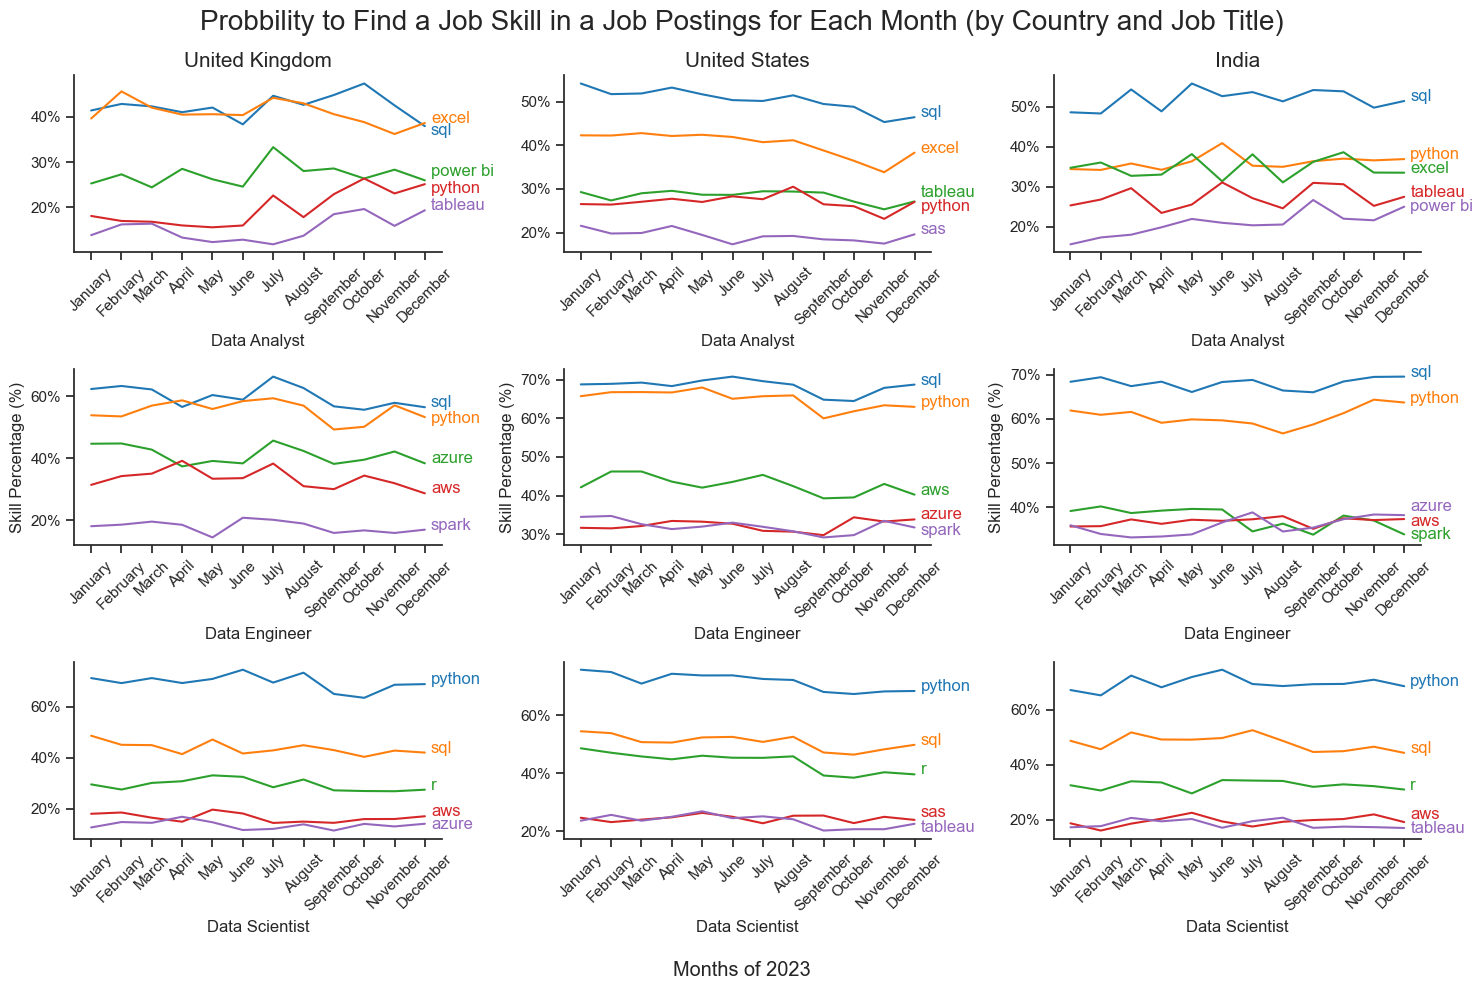

In [15]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters and Orders the Skills Count Table Using the Loop to Adjust the Filters Accordingly 
        df_plot = df_skills_perc[(df_skills_perc['job_country'] == country) & (df_skills_perc['job_title_short'] == job_title)]
        df_plot.loc['Total'] = df_plot.sum()
        df_plot = df_plot.reindex(columns = df_plot.loc['Total'].apply(pd.to_numeric, errors='coerce').sort_values(ascending=False).index)
        df_plot = df_plot.drop('Total')
        df_plot = df_plot.iloc[:, 0:5]

# Creation of the Chart Using Seaborn        
        sns.lineplot(
             data = df_plot,
             ax = ax[i, j],
             dashes = False,
             palette = 'tab10',
             legend = False
             )
        
# Create Chart Titles for Top Row Only to Distinguish Column for Countries
        ax[0, j].set_title(countries[j], fontsize = 15)
        
# Creates X-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_titles[i])

# Rotate the Months on the X-Axis by 45 Degrees
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=45)

# Makes the Y-Axis Scale Change to Percentage Format
        ax[i, j].yaxis.set_major_formatter(PercentFormatter(xmax = 100, decimals=0))

# Creates y-Axis Title for Middle Charts 
        if i == 1:
            ax[i, j].set_ylabel('Skill Percentage (%)')
        else:
            ax[i, j].set_ylabel('')

# Label and Colour Text Next to Lines
        lines = ax[i, j].get_lines() 
# First Line 
        if i == 0 and j == 0: 
             ax[i, j].text(11.2, df_plot.iloc[-1, 0] - 2, df_plot.columns[0], color=lines[0].get_color()) 
        else:
             ax[i, j].text(11.2, df_plot.iloc[-1, 0], df_plot.columns[0], color=lines[0].get_color())
# Second Line 
        if i == 1 and j == 0:
            ax[i, j].text(11.2, df_plot.iloc[-1, 1] - 2, df_plot.columns[1], color=lines[1].get_color())
        else:
            ax[i, j].text(11.2, df_plot.iloc[-1, 1], df_plot.columns[1], color=lines[1].get_color())
# Third Line 
        if i == 0 and j == 0:
             ax[i, j].text(11.2, df_plot.iloc[-1, 2] + 1, df_plot.columns[2], color=lines[2].get_color()) 
        elif i == 0 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 2] + 1, df_plot.columns[2], color=lines[2].get_color())
        elif i == 1 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 2] - 1, df_plot.columns[2], color=lines[2].get_color())
        else:
             ax[i, j].text(11.2, df_plot.iloc[-1, 2], df_plot.columns[2], color=lines[2].get_color()) 
# Fourth Line 
        if i == 0 and j == 0:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] - 2, df_plot.columns[3], color=lines[3].get_color()) 
        elif i == 0 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] - 2, df_plot.columns[3], color=lines[3].get_color())
        elif i == 1 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] - 1.5, df_plot.columns[3], color=lines[3].get_color())
        elif i == 2 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] + 1, df_plot.columns[3], color=lines[3].get_color())
        elif i == 2 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3] + 1, df_plot.columns[3], color=lines[3].get_color())
        else:
             ax[i, j].text(11.2, df_plot.iloc[-1, 3], df_plot.columns[3], color=lines[3].get_color())
# Fifth Line 
        if i == 0 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 1, df_plot.columns[4], color=lines[4].get_color())
        elif i == 1 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 2, df_plot.columns[4], color=lines[4].get_color()) 
        elif i == 1 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] + 1, df_plot.columns[4], color=lines[4].get_color())
        elif i == 2 and j == 0:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 2, df_plot.columns[4], color=lines[4].get_color())
        elif i == 2 and j == 1:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 3, df_plot.columns[4], color=lines[4].get_color())
        elif i == 2 and j == 2:
             ax[i, j].text(11.2, df_plot.iloc[-1, 4] - 2, df_plot.columns[4], color=lines[4].get_color())
        else: 
             ax[i, j].text(11.2, df_plot.iloc[-1, 4], df_plot.columns[4], color=lines[4].get_color())  

sns.despine()
fig.suptitle('Probbility to Find a Job Skill in a Job Postings for Each Month (by Country and Job Title)', fontsize = 20)
fig.supxlabel('Months of 2023')
plt.tight_layout()
plt.show()